# Socioviews

### Imports

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings("ignore")

## Preprocessament de dades

### Carregar les dades

In [2]:
resultat_path = os.path.join('dades', 'resultat')

#### Dades demogràfiques

In [3]:
# Llegir fitxer
demografica = pd.read_csv(os.path.join(resultat_path, 'demografica.csv'))

# Eliminar columnes innecessàries
demografica.drop(columns="Unnamed: 0", inplace=True)

# Canviar nom columna "Literal"
demografica.rename({"Literal": "Municipi"}, axis=1, inplace=True)

# Imprimir info
print("Dimensió demogràfica")
print(demografica.info())

Dimensió demogràfica
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19901 entries, 0 to 19900
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Codi                       19901 non-null  int64  
 1   Municipi                   19901 non-null  object 
 2   Any                        19901 non-null  int64  
 3   Total                      19901 non-null  int64  
 4   Homes                      19901 non-null  int64  
 5   Dones                      19901 non-null  int64  
 6   0-14 Anys                  19901 non-null  int64  
 7   15-64 Anys                 19901 non-null  int64  
 8   64 o més                   19901 non-null  int64  
 9   Índex d'envelliment        500 non-null    float64
 10  Índex de sobreenvelliment  500 non-null    float64
 11  Saldo migratori total      17988 non-null  float64
 12  Immigracions               17988 non-null  float64
 13  Emigracions              

In [4]:
demografica

,Codi,Municipi,Any,Total,Homes,Dones,0-14 Anys,15-64 Anys,64 o més,Índex d'envelliment,Índex de sobreenvelliment,Saldo migratori total,Immigracions,Emigracions
0,250019,Abella de la Conca,2000,197,106,91,31,125,41,NaN,NaN,NaN,NaN,NaN
1,80018,Abrera,2000,8177,4203,3974,1325,6162,690,NaN,NaN,NaN,NaN,NaN
2,250024,Àger,2000,528,284,244,39,299,190,NaN,NaN,NaN,NaN,NaN
3,250030,Agramunt,2000,4902,2506,2396,694,3152,1056,NaN,NaN,NaN,NaN,NaN
4,80023,Aguilar de Segarra,2000,213,106,107,26,114,73,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19896,431779,Vinebre,2020,425,215,210,64,263,98,NaN,NaN,7.0,23.0,16.0
19897,431785,Vinyols i els Arcs,2020,2124,1113,1011,371,1405,348,NaN,NaN,66.0,190.0,124.0
19898,83089,Viver i Serrateix,2020,172,88,84,27,98,47,NaN,NaN,6.0,8.0,2.0
19899,430521,Xerta,2020,1154,569,585,116,697,341,NaN,NaN,17.0,49.0,32.0


#### Dades econòmiques

In [5]:
# Llegir fitxer
economica = pd.read_csv(os.path.join(resultat_path, 'economica.csv'))

# Eliminar columnes innecessàries
economica.drop(columns=["Unnamed: 0", "Evolucio atur"], inplace=True)

# Canviar nom columna "Literal"
economica.rename({"Literal": "Municipi"}, axis=1, inplace=True)

# Imprimir info
print("\nDimensió econòmica")
print(economica.info())


Dimensió econòmica
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9824 entries, 0 to 9823
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Municipi         9824 non-null   object 
 1   Codi             9824 non-null   int64  
 2   Any              9824 non-null   int64  
 3   Aturats          8523 non-null   float64
 4   Poblacio activa  762 non-null    float64
 5   Renda            4086 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 460.6+ KB
None


In [6]:
economica

,Municipi,Codi,Any,Aturats,Poblacio activa,Renda
0,Abella de la Conca,250019,2012,11.9,NaN,NaN
1,Abrera,80018,2012,961.2,NaN,16.8
2,Àger,250024,2012,12.8,NaN,NaN
3,Agramunt,250030,2012,372.0,NaN,13.3
4,Aguilar de Segarra,80023,2012,9.1,NaN,NaN
...,...,...,...,...,...,...
9819,Vallbona d'Anoia,82922,2011,NaN,NaN,20.9
9820,Vandellòs i l'Hospitalet de l'Infant,431628,2011,NaN,NaN,13.9
9821,"Vendrell, el",431634,2011,NaN,NaN,18.8
9822,Vila-rodona,431704,2011,NaN,NaN,14.9


#### Dades residencials

In [7]:
# Llegir fitxer
residencial = pd.read_csv(os.path.join(resultat_path, 'residencial.csv'))

# Eliminar columnes innecessàries
residencial.drop(columns="Unnamed: 0", inplace=True)

# Canviar nom columna "Literal"
residencial.rename({"Literal": "Municipi"}, axis=1, inplace=True)

# Imprimir info
print("\nDimensió residencial")
print(residencial.info())


Dimensió residencial
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5069 entries, 0 to 5068
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Municipi                         5069 non-null   object 
 1   Codi                             5069 non-null   int64  
 2   Any                              5069 non-null   int64  
 3   Demanda                          3408 non-null   float64
 4   1                                1156 non-null   float64
 5   2                                1156 non-null   float64
 6   3                                1156 non-null   float64
 7   4                                1156 non-null   float64
 8   5                                1156 non-null   float64
 9   6 i més                          1156 non-null   float64
 10  Habitatges familiars secundaris  1893 non-null   float64
 11  Habitatges familiars vacants     1893 non-null   float64
 12

In [8]:
residencial

,Municipi,Codi,Any,Demanda,1,2,3,4,5,6 i més,Habitatges familiars secundaris,Habitatges familiars vacants,Habitatges familiars altres,Habitatges familiars principals,De lloguer,De propietat
0,Abrera,80018,2020,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agramunt,250030,2020,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Agullana,170010,2020,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aiguafreda,80142,2020,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aitona,250387,2020,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5064,Torre de Claramunt la,82861,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1204.0
5065,Vall d'en Bas la,172076,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.0,815.0
5066,Vall de Bianya la,172082,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,331.0
5067,Vall de Boí la,250432,2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,356.0


#### Dades urbanístiques

In [9]:
# Llegir fitxer
urbanistica = pd.read_csv(os.path.join(resultat_path, 'urbanistica.csv'))

# Eliminar columnes innecessàries
urbanistica.drop(columns=["Unnamed: 0", "Riscos"], inplace=True)

# Canviar nom columna "Literal"
urbanistica.rename({"Literal": "Municipi"}, axis=1, inplace=True)

# Imprimir info
print("\nDimensió urbanística")
print(urbanistica.info())


Dimensió urbanística
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8526 entries, 0 to 8525
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Any                 8526 non-null   int64  
 1   Serveis             8523 non-null   float64
 2   Municipi            8526 non-null   object 
 3   Codi                8526 non-null   int64  
 4   Solar               8523 non-null   float64
 5   Zones verdes        8523 non-null   float64
 6   Equipament          8523 non-null   float64
 7   Connectivitat       8523 non-null   float64
 8   Densitat comercial  2841 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 599.6+ KB
None


In [10]:
urbanistica

,Any,Serveis,Municipi,Codi,Solar,Zones verdes,Equipament,Connectivitat,Densitat comercial
0,2012,8.7221,Igualada,81022,289.6733,71.1228,16.9165,144.8569,NaN
1,2012,0.0000,Cardona,80478,38.7941,4.1436,16.3507,15.8741,NaN
2,2012,0.0000,"Llacuna, la",81043,13.1967,0.8157,27.4038,9.6753,NaN
3,2012,0.0000,Castellcir,80556,6.0954,0.5995,6.4467,5.0652,NaN
4,2012,7.1210,Castellbisbal,80543,402.8976,240.6678,22.4913,137.4469,NaN
...,...,...,...,...,...,...,...,...,...
8521,2020,0.0000,"Pla de Santa Maria, el",431080,22.8759,4.2432,29.7450,11.5493,NaN
8522,2020,0.0000,"Pobla de Mafumet, la",431093,26.1562,2.2511,15.3493,17.0407,NaN
8523,2017,NaN,"Cruïlles, Monells i Sant Sadurní de l'Heura",179011,NaN,NaN,NaN,NaN,194.0
8524,2018,NaN,"Cruïlles, Monells i Sant Sadurní de l'Heura",179011,NaN,NaN,NaN,NaN,239.0


#### Dades històriques habitatge social

In [11]:
# Llegir fitxer
habitatges = pd.read_excel(os.path.join('dades', 'habitatge_social.xlsx'))

# Eliminar columnes innecessàries
habitatges.drop(columns=["Data Construcció", "Total Hab"], inplace=True)

# Imprimir info
print(habitatges.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Municipi     238 non-null    object
 1   Any          238 non-null    int64 
 2   Hab Lloguer  238 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.7+ KB
None


#### Municipis de Catalunya

In [12]:
# Llegir fitxer
municipis = pd.read_csv(os.path.join('dades', 'noms_municipis.csv'))

# Eliminar columnes innecessàries
municipis.drop(columns="NomMun", inplace=True)

# Imprimir info
print(municipis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Municipi  947 non-null    object
 1   Codi      947 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.9+ KB
None


### Combinar dades

#### Afegir Codi municipi a llistat habitatges construïts

In [13]:
habitatges = habitatges.merge(municipis, how="left", on="Municipi")
habitatges["Codi"] = habitatges["Codi"].astype(int).astype(str)
habitatges

,Municipi,Any,Hab Lloguer,Codi
0,Abrera,2010,30,80018
1,Abrera,2010,30,80018
2,Alcover,2006,8,430056
3,Alella,2001,8,80039
4,Alella,2009,61,80039
...,...,...,...,...
233,Vilanova i la Geltrú,2003,35,83073
234,Vilanova i la Geltrú,2008,34,83073
235,Vilanova i la Geltrú,2008,64,83073
236,Vila-seca,2006,30,431711


#### Combinar municipis on s'ha construït el mateix any 

In [14]:
habitatges = habitatges.groupby(by = ["Municipi", "Any"]).sum().reset_index()
habitatges

,Municipi,Any,Hab Lloguer
0,Abrera,2010,60
1,Alcover,2006,8
2,Alella,2001,8
3,Alella,2009,61
4,Alguaire,2008,14
...,...,...,...
200,Vilanova i la Geltrú,1994,24
201,Vilanova i la Geltrú,1998,18
202,Vilanova i la Geltrú,2003,35
203,Vilanova i la Geltrú,2008,98


#### Creació d'un dataframe amb una fila per any i municipi

In [15]:
# Anys a realitzar l'estudi 
years = range(2000, 2021)

# Creació dataframe
municipis = pd.concat([municipis.assign(Any = y) for y in years], ignore_index=True)

# Imprimir info
print(municipis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19887 entries, 0 to 19886
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Municipi  19887 non-null  object
 1   Codi      19887 non-null  int64 
 2   Any       19887 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 466.2+ KB
None


#### Combinar municipis amb dades indicadors socioeconòmics 

In [16]:
# Demogràfica
indicadors = municipis.merge(demografica, how='left', on=["Codi", "Municipi", "Any"])
print(indicadors.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19887 entries, 0 to 19886
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Municipi                   19887 non-null  object 
 1   Codi                       19887 non-null  int64  
 2   Any                        19887 non-null  int64  
 3   Total                      19775 non-null  float64
 4   Homes                      19775 non-null  float64
 5   Dones                      19775 non-null  float64
 6   0-14 Anys                  19775 non-null  float64
 7   15-64 Anys                 19775 non-null  float64
 8   64 o més                   19775 non-null  float64
 9   Índex d'envelliment        500 non-null    float64
 10  Índex de sobreenvelliment  500 non-null    float64
 11  Saldo migratori total      17893 non-null  float64
 12  Immigracions               17893 non-null  float64
 13  Emigracions                17893 non-null  flo

In [17]:
# Economica
indicadors = indicadors.merge(economica, how='left', on=["Codi", "Municipi", "Any"])
print(indicadors.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19887 entries, 0 to 19886
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Municipi                   19887 non-null  object 
 1   Codi                       19887 non-null  int64  
 2   Any                        19887 non-null  int64  
 3   Total                      19775 non-null  float64
 4   Homes                      19775 non-null  float64
 5   Dones                      19775 non-null  float64
 6   0-14 Anys                  19775 non-null  float64
 7   15-64 Anys                 19775 non-null  float64
 8   64 o més                   19775 non-null  float64
 9   Índex d'envelliment        500 non-null    float64
 10  Índex de sobreenvelliment  500 non-null    float64
 11  Saldo migratori total      17893 non-null  float64
 12  Immigracions               17893 non-null  float64
 13  Emigracions                17893 non-null  flo

In [18]:
# Residencial
indicadors = indicadors.merge(residencial, how='left', on=["Codi", "Municipi", "Any"])
print(indicadors.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19887 entries, 0 to 19886
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Municipi                         19887 non-null  object 
 1   Codi                             19887 non-null  int64  
 2   Any                              19887 non-null  int64  
 3   Total                            19775 non-null  float64
 4   Homes                            19775 non-null  float64
 5   Dones                            19775 non-null  float64
 6   0-14 Anys                        19775 non-null  float64
 7   15-64 Anys                       19775 non-null  float64
 8   64 o més                         19775 non-null  float64
 9   Índex d'envelliment              500 non-null    float64
 10  Índex de sobreenvelliment        500 non-null    float64
 11  Saldo migratori total            17893 non-null  float64
 12  Immigracions      

In [19]:
# Urbanistica
indicadors = indicadors.merge(urbanistica, how='left', on=["Codi", "Municipi", "Any"])
print(indicadors.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19887 entries, 0 to 19886
Data columns (total 36 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Municipi                         19887 non-null  object 
 1   Codi                             19887 non-null  int64  
 2   Any                              19887 non-null  int64  
 3   Total                            19775 non-null  float64
 4   Homes                            19775 non-null  float64
 5   Dones                            19775 non-null  float64
 6   0-14 Anys                        19775 non-null  float64
 7   15-64 Anys                       19775 non-null  float64
 8   64 o més                         19775 non-null  float64
 9   Índex d'envelliment              500 non-null    float64
 10  Índex de sobreenvelliment        500 non-null    float64
 11  Saldo migratori total            17893 non-null  float64
 12  Immigracions      

### Expandir dades

#### Afegir dades d'anys anteriors

Si d'un any no hi ha dades, es poden agafar les dades de l'any previ més proper del qual es disposen de dades. 

In [20]:
# Renda familiar
renda_in = indicadors.loc[indicadors["Any"] == 2018, ["Municipi", "Renda"]]
for any in [2019, 2020]:
    indicadors.loc[(indicadors["Any"] == any), "Renda"] = renda_in["Renda"].values

In [21]:
# Població activa
poblacio_in = indicadors.loc[indicadors["Any"] == 2011, ["Municipi", "Poblacio activa"]]
for any in range(2012, 2021):
    indicadors.loc[(indicadors["Any"] == any), "Poblacio activa"] = poblacio_in["Poblacio activa"].values

In [22]:
# Tipus d'Habitatge
for ind in ["Habitatges familiars secundaris", "Habitatges familiars vacants", "Habitatges familiars altres", "Habitatges familiars principals"]:

    # Any 2001
    tipus_in = indicadors.loc[indicadors["Any"] == 2001, ["Municipi", ind]]
    for any in range(2002, 2011):
        indicadors.loc[(indicadors["Any"] == any), ind] = tipus_in[ind].values

    # Any 2011
    tipus_in = indicadors.loc[indicadors["Any"] == 2011, ["Municipi", ind]]
    for any in range(2012, 2021):
        indicadors.loc[(indicadors["Any"] == any), ind] = tipus_in[ind].values

In [23]:
# Tinença
for ind in ["De lloguer", "De propietat"]:

    # Any 2001
    tinença_in = indicadors.loc[indicadors["Any"] == 2001, ["Municipi", ind]]
    for any in range(2002, 2011):
        indicadors.loc[(indicadors["Any"] == any), ind] = tinença_in[ind].values

    # Any 2011
    tinença_in = indicadors.loc[indicadors["Any"] == 2011, ["Municipi", ind]]
    for any in range(2012, 2021):
        indicadors.loc[(indicadors["Any"] == any), ind] = tinença_in[ind].values

In [24]:
# Persones per habitatge
for ind in ["1", "2", "3", "4", "5", "6 i més"]:

    # Any 2001
    habitants_in = indicadors.loc[indicadors["Any"] == 2001, ["Municipi", ind]]
    for any in range(2002, 2011):
        indicadors.loc[(indicadors["Any"] == any), ind] = habitants_in[ind].values

    # Any 2011
    habitants_in = indicadors.loc[indicadors["Any"] == 2011, ["Municipi", ind]]
    for any in range(2012, 2021):
        indicadors.loc[(indicadors["Any"] == any), ind] = habitants_in[ind].values

In [25]:
# Densitat comercial
comerc_in = indicadors.loc[indicadors["Any"] == 2018, ["Municipi", "Densitat comercial"]]
for any in [2019, 2020]:
    indicadors.loc[(indicadors["Any"] == any), "Densitat comercial"] = comerc_in["Densitat comercial"].values

#### Normalitzar les dades de població en percentatge respecte a la població total del municipi

In [26]:
for ind in ["Homes", "Dones", "0-14 Anys", "15-64 Anys", "64 o més", "Immigracions", "Emigracions"]:
    indicadors[ind] = indicadors[ind]/indicadors["Total"]

In [27]:
indicadors

,Municipi,Codi,Any,Total,Homes,Dones,0-14 Anys,15-64 Anys,64 o més,Índex d'envelliment,...,Habitatges familiars altres,Habitatges familiars principals,De lloguer,De propietat,Serveis,Solar,Zones verdes,Equipament,Connectivitat,Densitat comercial
0,Abella de la Conca,250019,2000,197.0,0.538071,0.461929,0.157360,0.634518,0.208122,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abrera,80018,2000,8177.0,0.514003,0.485997,0.162040,0.753577,0.084383,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Àger,250024,2000,528.0,0.537879,0.462121,0.073864,0.566288,0.359848,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agramunt,250030,2000,4902.0,0.511220,0.488780,0.141575,0.643003,0.215422,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aguilar de Segarra,80023,2000,213.0,0.497653,0.502347,0.122066,0.535211,0.342723,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19882,Vinaixa,252555,2020,450.0,0.522222,0.477778,0.097778,0.582222,0.320000,NaN,...,NaN,236.0,NaN,NaN,0.0000,9.5782,0.4492,74.1264,5.7933,944.0
19883,Vinebre,431779,2020,425.0,0.505882,0.494118,0.150588,0.618824,0.230588,NaN,...,NaN,199.0,NaN,NaN,0.3125,7.0113,0.6992,62.8270,3.6389,581.0
19884,Vinyols i els Arcs,431785,2020,2124.0,0.524011,0.475989,0.174670,0.661488,0.163842,NaN,...,NaN,771.0,174.0,507.0,0.0000,18.3862,2.4309,12.0271,13.2748,2530.0
19885,Viver i Serrateix,83089,2020,172.0,0.511628,0.488372,0.156977,0.569767,0.273256,NaN,...,NaN,47.0,NaN,NaN,0.0000,1.3300,0.1148,46.9998,0.4067,0.0


### Creació dades per predicció

#### Integrar a les dades dels indicadors la variable a predir

In [28]:
# Estudi es centra del 2000 en endavant -> Dades només a partir del 2000
habitatges = habitatges[habitatges["Any"] >= 2000]
habitatges.shape
# Exportar dades
habitatges.to_csv(os.path.join("dades", "habitatges.csv"))

In [29]:
data = indicadors.merge(habitatges, how="left", on=["Municipi", "Any"])
data

,Municipi,Codi,Any,Total,Homes,Dones,0-14 Anys,15-64 Anys,64 o més,Índex d'envelliment,...,Habitatges familiars principals,De lloguer,De propietat,Serveis,Solar,Zones verdes,Equipament,Connectivitat,Densitat comercial,Hab Lloguer
0,Abella de la Conca,250019,2000,197.0,0.538071,0.461929,0.157360,0.634518,0.208122,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abrera,80018,2000,8177.0,0.514003,0.485997,0.162040,0.753577,0.084383,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Àger,250024,2000,528.0,0.537879,0.462121,0.073864,0.566288,0.359848,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Agramunt,250030,2000,4902.0,0.511220,0.488780,0.141575,0.643003,0.215422,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aguilar de Segarra,80023,2000,213.0,0.497653,0.502347,0.122066,0.535211,0.342723,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19882,Vinaixa,252555,2020,450.0,0.522222,0.477778,0.097778,0.582222,0.320000,NaN,...,236.0,NaN,NaN,0.0000,9.5782,0.4492,74.1264,5.7933,944.0,NaN
19883,Vinebre,431779,2020,425.0,0.505882,0.494118,0.150588,0.618824,0.230588,NaN,...,199.0,NaN,NaN,0.3125,7.0113,0.6992,62.8270,3.6389,581.0,NaN
19884,Vinyols i els Arcs,431785,2020,2124.0,0.524011,0.475989,0.174670,0.661488,0.163842,NaN,...,771.0,174.0,507.0,0.0000,18.3862,2.4309,12.0271,13.2748,2530.0,NaN
19885,Viver i Serrateix,83089,2020,172.0,0.511628,0.488372,0.156977,0.569767,0.273256,NaN,...,47.0,NaN,NaN,0.0000,1.3300,0.1148,46.9998,0.4067,0.0,NaN


#### Variable a predir

La variable que volem predir és la presència/absència d'habitatge social en aquell any. Per això, utilitzarem la columna "Hab Lloguer" per obtenir aquesta nova variable que serà igual a 1 si hi ha hagut com a mínim una construcció d'habitatge social en aquell municipi i aquell any.

In [30]:
data.loc[data["Hab Lloguer"].isna(), "Hab Lloguer"] = 0
data.loc[data["Hab Lloguer"] > 0, "Hab Lloguer"] = 1

In [31]:
data

,Municipi,Codi,Any,Total,Homes,Dones,0-14 Anys,15-64 Anys,64 o més,Índex d'envelliment,...,Habitatges familiars principals,De lloguer,De propietat,Serveis,Solar,Zones verdes,Equipament,Connectivitat,Densitat comercial,Hab Lloguer
0,Abella de la Conca,250019,2000,197.0,0.538071,0.461929,0.157360,0.634518,0.208122,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,Abrera,80018,2000,8177.0,0.514003,0.485997,0.162040,0.753577,0.084383,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,Àger,250024,2000,528.0,0.537879,0.462121,0.073864,0.566288,0.359848,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,Agramunt,250030,2000,4902.0,0.511220,0.488780,0.141575,0.643003,0.215422,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,Aguilar de Segarra,80023,2000,213.0,0.497653,0.502347,0.122066,0.535211,0.342723,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19882,Vinaixa,252555,2020,450.0,0.522222,0.477778,0.097778,0.582222,0.320000,NaN,...,236.0,NaN,NaN,0.0000,9.5782,0.4492,74.1264,5.7933,944.0,0.0
19883,Vinebre,431779,2020,425.0,0.505882,0.494118,0.150588,0.618824,0.230588,NaN,...,199.0,NaN,NaN,0.3125,7.0113,0.6992,62.8270,3.6389,581.0,0.0
19884,Vinyols i els Arcs,431785,2020,2124.0,0.524011,0.475989,0.174670,0.661488,0.163842,NaN,...,771.0,174.0,507.0,0.0000,18.3862,2.4309,12.0271,13.2748,2530.0,0.0
19885,Viver i Serrateix,83089,2020,172.0,0.511628,0.488372,0.156977,0.569767,0.273256,NaN,...,47.0,NaN,NaN,0.0000,1.3300,0.1148,46.9998,0.4067,0.0,0.0


#### Exportar les dades

In [32]:
data.to_csv(os.path.join("dades", "indicadors.csv"))

### Modificació dades


#### Eliminar columnes on faltin moltes dades

In [33]:
for column in data.columns:
    if len(data[data[column].isna()]) > 14000:
        print("Dropping column " + str(column) + " with " + str(len(data[data[column].isna()])) + " null values")
        data.drop(columns=column, inplace=True)

Dropping column Índex d'envelliment with 19387 null values
Dropping column Índex de sobreenvelliment with 19387 null values
Dropping column Renda with 14893 null values
Dropping column Demanda with 16479 null values
Dropping column Densitat comercial with 16103 null values


#### Imputar valors 

Els valors que faltin es poden imputar segons la mitjana de la columna.

In [34]:
# Afagar les columnes quantitatives
num_columns = data.columns[3:]
# Afagar les columnes qualitatives
str_columns = data.columns[:3]

In [35]:
# Reemplaçar valors infinits amb no definits (nan)
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Imputar els valors que falten segons la mitjana de la columna
miss_mean_imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
miss_mean_imputer = miss_mean_imputer.fit(data[num_columns].values)
data[num_columns] = miss_mean_imputer.transform(data[num_columns].values)

## Model predictiu

### Preparació datasets per entrenar i predir
Les recomanacions a Incasòl es faran per l'any 2020 i el model s'entrenarà amb dades del 2000 al 2019

#### Dades a predir

In [36]:
# Agafar dades a predir
data_2020 = data[data["Any"] == 2020]
print(data_2020.shape)

# Dividir entre dades i columna a predir
X_pred = data_2020[num_columns]
X_pred.drop(columns="Hab Lloguer", inplace=True)
X_pred = X_pred.values
y_pred = data_2020["Hab Lloguer"].values

(947, 32)


#### Dades per entrenar el model

In [37]:
# Agafar dades any diferent a 2020
data_no_2020 = data[data["Any"] != 2020]
print(data_no_2020.shape)

# Dividir entre dades i columna a predir
X = data_no_2020[num_columns]
X.drop(columns="Hab Lloguer", inplace=True)
X = X.values
y = data_no_2020["Hab Lloguer"].values

(18940, 32)


#### Exploració dataset per entrenar

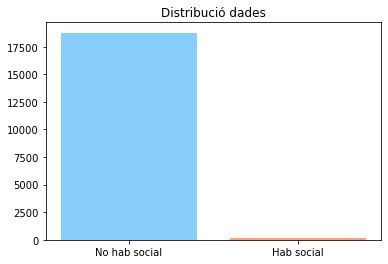

In [38]:
dict_train = {"No hab social": list(y).count(0.0), "Hab social": list(y).count(1.0)}
plt.bar(list(dict_train.keys()), list(dict_train.values()), color=["lightskyblue", "lightsalmon"])
plt.title("Distribució dades")
plt.show()

#### Estratègia de sampling

Donat que el model està molt desproporcionat, es poden utilitzar diferents estratègies per aconseguir unes dades més balanced, és a dir, on la representació de Hab social i No hab social sigui més igual. La idea és que hi hagi el doble de No hab social que de Hab social.

Les dues estratègies que es proposen són undersampling i oversampling. En el primer cas, disminuim el nombre de mostres de la classe majoritaria perquè el seu nombre sigui el doble del nombre de mostres de la classe minoritaria. En el segon cas, augmentem el nombre de mostres de la classe minoritaria perquè el seu nombre sigui la meitat del nombre de mostres de la classe majoritaria. 

També es pot optar per no especificar una estratègia de sampling, però els resultats que s'han obtingut no són satisfactoris. 

A continuació, s'especifica la estratègia de sampling com a oversampling, ja que així no es redueix el tamany de les dades a un valor molt baix. 

In [39]:
#### Define sampling strategy ['None', 'Under', 'Over']
strategy = 'Over'

#### Realitzar sampling si s'especifica

In [40]:
if strategy == 'Under':
    undersampling = RandomUnderSampler(sampling_strategy = 0.5)
    X_under, y_under = undersampling.fit_resample(X, y)
elif strategy == 'Over':
    over_sampling = RandomOverSampler(sampling_strategy = 0.5)
    X_over, y_over = over_sampling.fit_resample(X, y)


#### Dividir el dataset per entrenar

Una part del dataset d'entrenar ha d'anar destinat a testejar la performance del model, per això, es divideix entre train i test on test és el 10% de les dades. 

In [41]:
# Split dataset according to sampling strategy
if strategy == 'Under':
    X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size=0.1, shuffle=True)
elif strategy == 'Over':
    X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.1, shuffle=True)
else:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

In [42]:
print("X train: " + str(X_train.shape))
print("y train: " + str(y_train.shape))
print("X test: " + str(X_test.shape))
print("y test: " + str(y_test.shape))
print("X pred: " + str(X_pred.shape))
print("y pred: " + str(y_pred.shape))

X train: (25343, 28)
y train: (25343,)
X test: (2816, 28)
y test: (2816,)
X pred: (947, 28)
y pred: (947,)


#### Visualització dels nous datasets per entrenar el model

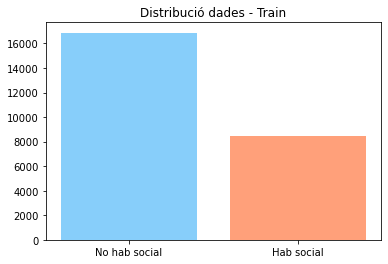

In [43]:
dict_train = {"No hab social": list(y_train).count(0.0), "Hab social": list(y_train).count(1.0)}
plt.bar(list(dict_train.keys()), list(dict_train.values()), color=["lightskyblue", "lightsalmon"])
plt.title("Distribució dades - Train")
plt.show()

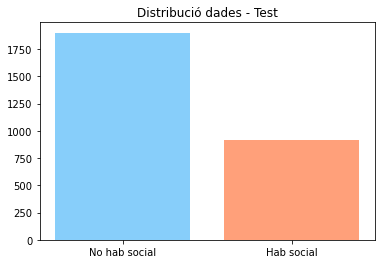

In [44]:
dict_test = {"No hab social": list(y_test).count(0.0), "Hab social": list(y_test).count(1.0)}
plt.bar(list(dict_test.keys()), list(dict_test.values()), color=["lightskyblue", "lightsalmon"])
plt.title("Distribució dades - Test")
plt.show()

### Entrenament Model

Per realitzar les prediccions, s'utilitzarà un model predictiu de regressió logística destinat a classificar entre dues classes: "Hab social" i "No hab social"

In [45]:
# Definició del model
model = LogisticRegression(C = 100, penalty = 'l2', max_iter=10000, solver = 'liblinear')

# Entrenament del model
model.fit(X_train, y_train)

# Càlcul prediccions
test_pred = model.predict(X_test)
test_prob = model. predict_proba(X_test)
test_mod = np.where(test_prob[:, 1] >= 0.3, 1, 0)

#### Accuracy

La mètrica accuracy resumeix com de bé el model és capaç de classificar entre dues classes. 

In [46]:
# Mostrar l'accuracy de classificació model
print('The accuracy score is:')
print(accuracy_score(y_test, test_mod))
print()

The accuracy score is:
0.8643465909090909



#### Classification report

El classification report resumeix una sèrie de mètriques que serveixen per avaluar la performance del model. 

In [47]:
# Mostrar el classification report
print('Classification report')
print(classification_report(y_test, test_mod))

Classification reprot
              precision    recall  f1-score   support

         0.0       0.94      0.85      0.89      1900
         1.0       0.74      0.90      0.81       916

    accuracy                           0.86      2816
   macro avg       0.84      0.87      0.85      2816
weighted avg       0.88      0.86      0.87      2816



#### Matriu de confusió

La matriu de confusió mostra de forma visual com està classificant les samples el model. Idealment volem que els elements a la diagonal siguin més alts que els altres elements. Això indica que el model està classificant "No hab social" com a "No hab social" i "Hab social" com a tal. 

A més a més, donat que Incasòl a vegades pot no posar habitatge social en un municipi tot i que es compleixin les condicions per falta de pressupost, no suposa un problema si el model classifica incorrectament "No hab social" com a "Hab social", ja que es pot donar el cas que els indicadors compleixin les condicions per posar habitatge social, però en aquell moment no se'n pogués posar per diferents motius. 

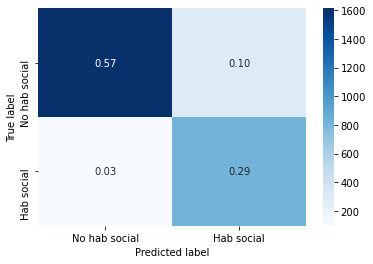

In [48]:
conf = confusion_matrix(y_test, test_mod)

annot = np.empty_like(conf).astype(str)
for i in range(conf.shape[0]):
    for j in range(conf.shape[0]):
        annot[i, j] = format(conf[i,j]/conf.sum(), ".2f")

cm = pd.DataFrame(conf, index = ['No hab social', 'Hab social'], columns = ['No hab social', 'Hab social'])
cm.index.name = 'True label'
cm.columns.name = 'Predicted label'
sns.heatmap(cm, annot = annot, fmt = '', cmap = 'Blues')
plt.show()

#### Probability density plot 

El probability density plot s'utilitza per establir quin és el valor probabílistic a partir del qual s'ha de considerar una sample com a "Hab social". En aquest cas, a través del plot s'ha pogut establir que 0.3 és el valor idoni. 

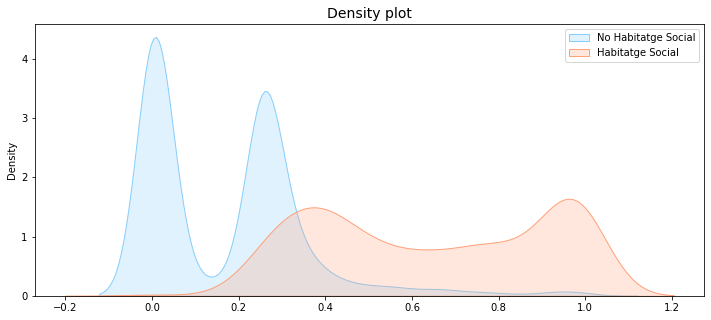

In [49]:
# Mostrar el probability density plot
plt.figure(figsize = (12, 5))
sns.kdeplot(x = test_prob[y_test == 0][:, 1], label = 'No Habitatge Social', shade = True, color = 'lightskyblue')
sns.kdeplot(x = test_prob[y_test == 1][:, 1], label = 'Habitatge Social', shade = True, color = 'lightsalmon')
plt.title('Density plot', fontdict = {'size': 14})
plt.legend()
plt.show()

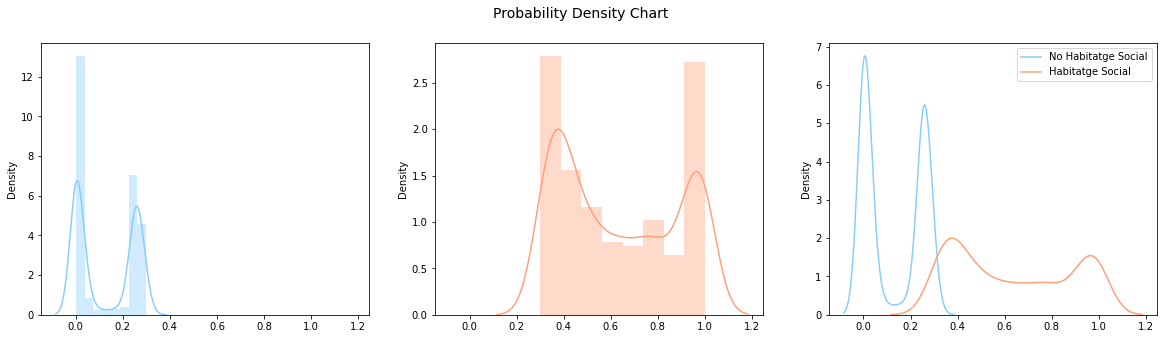

In [50]:
# Mostrar el probability density chart
fig, ax = plt.subplots(1, 3, figsize = (20, 5), sharex = True)
fig.suptitle('Probability Density Chart', fontsize = 14)
sns.distplot(test_prob[test_mod == 0][:, 1], ax = ax[0], label = 'No Habitatge Social', color = 'lightskyblue')
sns.distplot(test_prob[test_mod == 1][:, 1], ax = ax[1], label = 'Habitatge Social', color = 'lightsalmon')
sns.kdeplot(x = test_prob[test_mod == 0][:, 1], ax = ax[2], label = 'No Habitatge Social', color = 'lightskyblue')
sns.kdeplot(x = test_prob[test_mod == 1][:, 1], ax = ax[2], label = 'Habitatge Social', color = 'lightsalmon')
plt.legend()
plt.show()

#### Indicadors més importants

A partir del dataframe de coeficients, podem obtenir el feature importance chart que serveix per decidir quins indicadors socioeconòmics han tingut més influència en el model, és a dir, han servit per decidir si s'hi posava habitatge social o no.

In [51]:
# Calcular el dataframe de coeficients
coefficients = pd.DataFrame(model.coef_.ravel())

column_df = pd.DataFrame(num_columns)
column_df.replace({"1": "Persones per habitatge: 1", "2": "Persones per habitatge: 2", "3": "Persones per habitatge: 3", "4": "Persones per habitatge: 4", "5": "Persones per habitatge: 5", "6 i més": "Persones per habitatge: 6 i més"}, inplace=True)
coef_summary = (pd.merge(coefficients, column_df, left_index = True, right_index = True, how = "left"))
coef_summary.columns = ["coefficients", "features"]
coef_summary = coef_summary.sort_values(by = "coefficients", ascending = False)

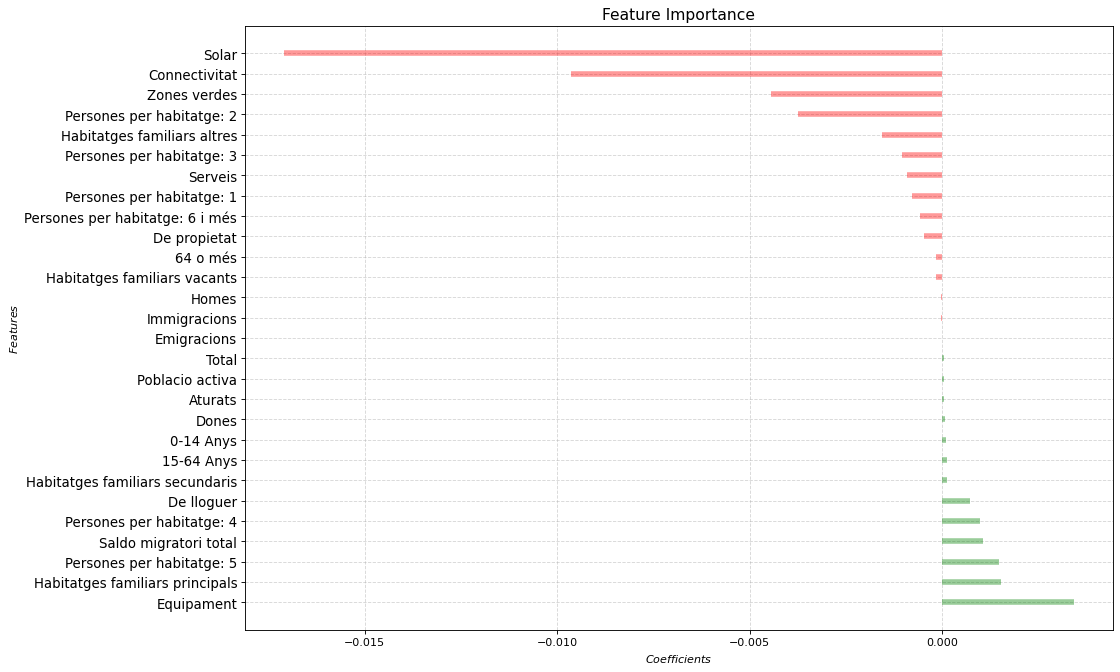

In [52]:
# Preparar les dades
coef_summary.reset_index(inplace = True)
coef_summary['colors'] = ['red' if x < 0 else 'green' for x in coef_summary['coefficients']]
coef_summary

# Mostrar el plot
plt.figure(figsize = (14, 10), dpi = 80)
plt.hlines(y = coef_summary.index, xmin = 0, xmax = coef_summary.coefficients, color = coef_summary.colors, alpha = 0.4, 
            linewidth = 5)
plt.gca().set(ylabel = '$Features$', xlabel = '$Coefficients$')
plt.yticks(coef_summary.index, coef_summary.features, fontsize = 12)
plt.title('Feature Importance', fontdict = {'size': 14})
plt.grid(linestyle = '--', alpha = 0.5)
plt.show()

### Prediccions per l'any 2020

Utilitzant el model previament entrenat, realitzem les prediccions i les guardem al dataset que teníem per l'any 2020.

In [53]:
pred_ = model.predict(X_pred)
pred_prob = model.predict_proba(X_pred)
data_2020["Prediction"] = np.where(pred_prob[:, 1] >= 0.3, 1, 0)
data_2020["Probability"] = pred_prob[:, 1]
data_2020

,Municipi,Codi,Any,Total,Homes,Dones,0-14 Anys,15-64 Anys,64 o més,Saldo migratori total,...,De lloguer,De propietat,Serveis,Solar,Zones verdes,Equipament,Connectivitat,Hab Lloguer,Prediction,Probability
18940,Abella de la Conca,250019,2020,183.0,0.540984,0.459016,0.098361,0.661202,0.240437,-9.0,...,674.494424,2797.022305,0.0000,1.6005,0.1830,8.8786,1.1732,0.0,0,0.001727
18941,Abrera,80018,2020,12538.0,0.504466,0.495534,0.178338,0.667172,0.154490,71.0,...,335.000000,3887.000000,4.0700,83.8462,35.9782,6.7174,39.0268,0.0,0,0.149757
18942,Àger,250024,2020,580.0,0.541379,0.458621,0.087931,0.612069,0.300000,19.0,...,674.494424,2797.022305,0.3984,21.3406,7.6347,37.9421,11.5008,0.0,0,0.001692
18943,Agramunt,250030,2020,5411.0,0.500832,0.499168,0.154685,0.644058,0.201257,64.0,...,412.000000,1534.000000,0.6891,47.3515,12.0783,13.4938,27.1625,0.0,1,0.346867
18944,Aguilar de Segarra,80023,2020,282.0,0.524823,0.475177,0.191489,0.627660,0.180851,3.0,...,674.494424,2797.022305,0.0000,3.9790,0.3703,25.1030,2.4754,0.0,0,0.002045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19882,Vinaixa,252555,2020,450.0,0.522222,0.477778,0.097778,0.582222,0.320000,19.0,...,674.494424,2797.022305,0.0000,9.5782,0.4492,74.1264,5.7933,0.0,0,0.002448
19883,Vinebre,431779,2020,425.0,0.505882,0.494118,0.150588,0.618824,0.230588,7.0,...,674.494424,2797.022305,0.3125,7.0113,0.6992,62.8270,3.6389,0.0,0,0.002331
19884,Vinyols i els Arcs,431785,2020,2124.0,0.524011,0.475989,0.174670,0.661488,0.163842,66.0,...,174.000000,507.000000,0.0000,18.3862,2.4309,12.0271,13.2748,0.0,0,0.009023
19885,Viver i Serrateix,83089,2020,172.0,0.511628,0.488372,0.156977,0.569767,0.273256,6.0,...,674.494424,2797.022305,0.0000,1.3300,0.1148,46.9998,0.4067,0.0,0,0.001968


#### Recomancions de municipis

A continaució, es mostra una llista amb els municipis on el model recomana amb probabilitat superior a 0.5 posar habitatge social.

In [54]:
# Municipis recomants
habit_social = data_2020[(data_2020["Prediction"] == 1) & (data_2020["Probability"] > 0.5)]
habit_social = habit_social.sort_values(by="Probability", ascending=False)
habit_social["Probability"] = habit_social["Probability"]*100
print(len(habit_social[["Municipi", "Probability"]]))
habit_social[["Municipi", "Probability"]]

8


,Municipi,Probability
19316,"Hospitalet de Llobregat, l'",99.153087
19614,Salt,88.635429
19282,Guissona,72.631797
19875,Vilassar de Mar,64.333286
19699,Sant Vicenç de Montalt,60.041342
19593,Riudoms,57.765587
19094,Canovelles,57.115557
19689,Sant Pol de Mar,52.126868


In [55]:
habit_social.to_csv(os.path.join("dades", "prediccions.csv"))